# Different latent dimensions

In [10]:
import os
import numpy as np
from matplotlib import pyplot as plt

import specvae.utils as utils
from specvae.utils import filter_score_matrix
import specvae.dataset as dt
from specvae.visualize import plot_distribution, plot_precentile
from specvae.dataset import MoNA

In [11]:
dataset = 'MoNA'

In [12]:
jaccard_scores = np.load(utils.get_project_path() / '.data' / dataset / ('%s_sim_jaccard.npy' % dataset), allow_pickle=True)

eu_files = [
    '%s_vaesim_eu.npz' % dataset,
    '%s_vaesim_eu_200.npz' % dataset
]
model_names = ['specvae_2500-500-50-500-2500', 'specvae_2500-500-200-500-2500']
eu_data = []
for file in eu_files:
    vs = np.load(utils.get_project_path() / '.data' / dataset / file, allow_pickle=True)
    eu_data.append(vs['vae_eu'])

In [13]:
cs = np.load(utils.get_project_path() / '.data' / dataset / ('%s_cossim.npz' % dataset), allow_pickle=True)
cos_sim, cos_match = cs['sim'], cs['match']
spec2vec_scores = np.load(utils.get_project_path() / '.data' / dataset / ('%s_spec2vec.npz' % dataset), allow_pickle=True)
s2v_sim = spec2vec_scores['sim']

In [14]:
ignore_diagonal = False
num_bins = 100
show_top_percentile=0.1

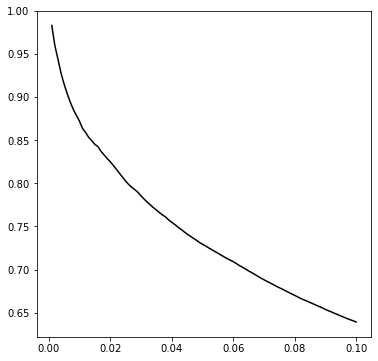

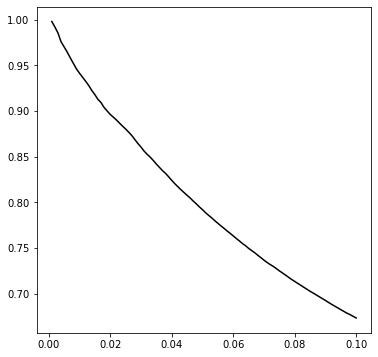

In [15]:
cos_per = plot_precentile(jaccard_scores, cos_sim, num_bins=num_bins, 
    show_top_percentile=0.1, ignore_diagonal=True)
s2v_per = plot_precentile(jaccard_scores, s2v_sim, num_bins=num_bins, 
    show_top_percentile=0.1, ignore_diagonal=True)

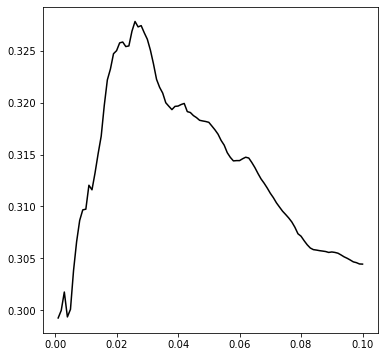

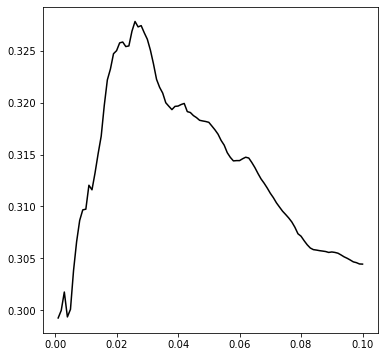

In [16]:
eu_per = []
for sim in eu_data:
        eu_per.append(plot_precentile(jaccard_scores, sim[0], num_bins=num_bins, 
                show_top_percentile=0.1, ignore_diagonal=True))

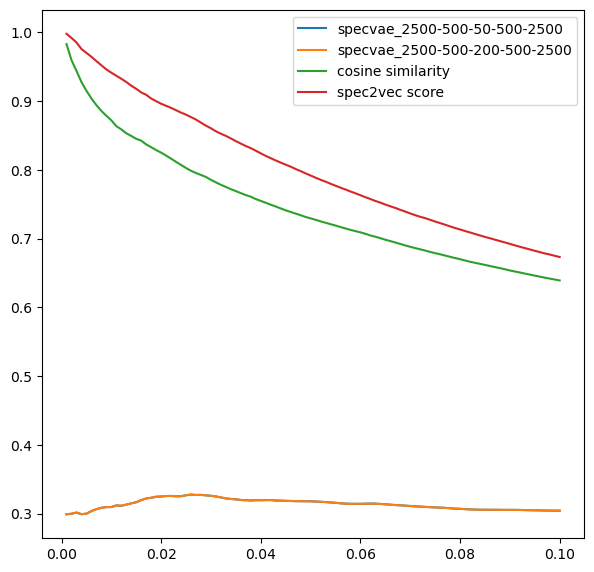

In [17]:
fig, ax = plt.subplots(figsize=(7,7), dpi=100)
x_percentiles = (show_top_percentile / num_bins * (1 + np.arange(num_bins)))[::-1]
for i, per in enumerate(eu_per):
    plt.plot(x_percentiles, per, label=model_names[i])
plt.plot(x_percentiles, cos_per, label='cosine similarity')
plt.plot(x_percentiles, s2v_per, label='spec2vec score')
plt.legend()
plt.show()